# Biodiversity in National Parks

We'll examine two sets of data looking at conservation of species across state parks. 

Some questions we'll examine using this data include: 

1. What is the distribution of conservation status for the species?
2. Are some species more likely to be endangered?
3. Are there some species that are more prevalent?
4. Are the differences between species and their conservation status significant?

In [1]:
# First we need to import the libraries that will be used
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
# Next we need to load in the data from a .csv file using pandas

observations = pd.read_csv('observations.csv')

species_info = pd.read_csv('species_info.csv')

## Exploring the Data

After loading the data from .csv files into dataframes it would be a good idea to explore the data. It will give us a chance to see if there are any missing values as well as get a general feel for what is included in the dataframes. It can also give us some insight into what is included as far as how the data is categorized since it will involve species which can be grouped together.

In [3]:
# Using print and .head() we can examine the newly created dataframes

print(observations.head())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [4]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [5]:
# Let's use the .unique() method to examine conservation_status since all that's being displayed currently is NaN.

print(species_info.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [6]:
# How many values do we have across this column, including our NaN values?

print(f'NaN values: {species_info.conservation_status.isna().sum()}')

print(species_info.groupby('conservation_status').size())

NaN values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [7]:
# What about our other categories? 

print(f'Number of categories:  {species_info.category.nunique()}')
print(f'Categories: , {species_info.category.unique()}')

Number of categories:  7
Categories: , ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
# If we group the categories together we can get a count of how many are in each category.

species_info.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [9]:
# What does our Observation dataframe look like? How many parks are included in it? 

print(f'Number of parks: {observations.park_name.nunique()}')
print(f'Name of parks: {observations.park_name.unique()}')

Number of parks: 4
Name of parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [10]:
# How many observations were made in total? Across the parks?

print(f'Total obersations: {observations.observations.sum()}')
print(observations.groupby('park_name').observations.sum())

Total obersations: 3314739
park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


## Analysis

We will come back to our questions from earlier now.

1. What is the distribution of conservation status for the species?
2. Are some species more likely to be endangered?
3. Are there some species that are more prevalent?
4. Are the differences between species and their conservation status significant?

Before we can really begin to analyze the data we were given, we need to decide what to do with all the NaN values in the 'conservation_status' column in the species_info dataframe. 

This value could be left blank for many reasons. However, after looking at the other values in the dataframe which included statements such as 'Endangered' and 'Threatened' it may be that these were left blank since they are not a concern and thus need no help or intervention.

In [11]:
# It would be a good idea to fill in the over 5000 NaN values in the 'conservation_status' column of the 
# species_info dataframe.

species_info.fillna('No Intervention', inplace=True)
species_info.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

## What is the distribution of the conservation status for the species?

Text(0.5, 1.0, 'Distribution of Species Conservation Status')

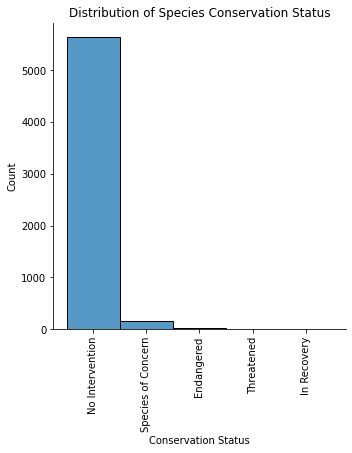

In [12]:

sns.displot(data=species_info, x='conservation_status')
plt.tick_params('x', rotation=90)
plt.xlabel('Conservation Status')
plt.title('Distribution of Species Conservation Status')

This shows us that the data for conservation status is right-skewed due to the large amount of 'No Intervention' data that is shown.

## Are some species more likely to be endangered?


In [13]:
# We need to group our conservation_status category by count but exclude the 'No Intervention' 
# group since they are not currently being looked at in terms of endangerment. 

Conservation_Counts = species_info[species_info.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

print(Conservation_Counts)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


Text(0.5, 1.0, 'Number of Species by Conservation Status, Category')

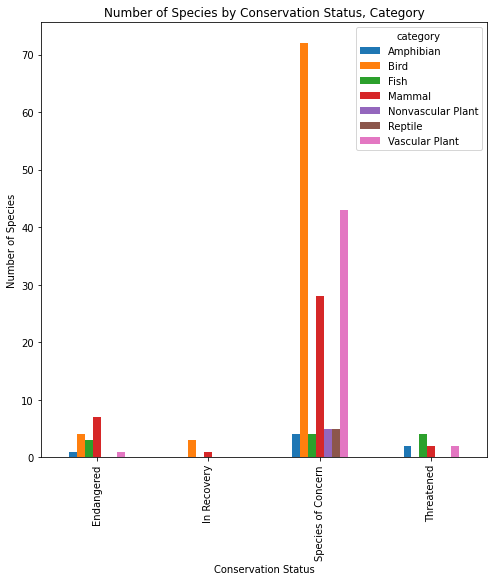

In [14]:
Conservation_Counts.plot(kind='bar', figsize=(8, 8), 
                        )

plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.title('Number of Species by Conservation Status, Category')

From the above plot we can see that the largest group in 'Conservation Status' is 'Species of Concern', and it's mostly made up of birds, followed by vascular plants and then mammals. 'Endangered' species is next and mostly consists of mammals then birds. 

## Are there some species that are more prevalent?

In [15]:
# Let's begin by adding another column to our species_info dataframe to track the total number of species 
# that are currently protected (meaning anything that does not fall under the 'No Intervention' category).

species_info['is_protected'] = species_info.conservation_status != 'No Intervention'


In [16]:
# Use groupby() and nunique() to see the count of each category based on protected status.

category_counts = species_info.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
    .pivot(columns='is_protected',
            index='category',
            values='scientific_name')\
            .reset_index()

category_counts.columns = ['category', 'not_protected', 'is_protected']

print(category_counts)

            category  not_protected  is_protected
0          Amphibian             72             7
1               Bird            413            75
2               Fish            115            11
3             Mammal            146            30
4  Nonvascular Plant            328             5
5            Reptile             73             5
6     Vascular Plant           4216            46


In [17]:
# We can add another column to this dataframe that will have the percent of each that is protected.

category_counts['percent_protected'] = category_counts.is_protected / \
    (category_counts.is_protected + category_counts.not_protected) * 100

print(category_counts)

            category  not_protected  is_protected  percent_protected
0          Amphibian             72             7           8.860759
1               Bird            413            75          15.368852
2               Fish            115            11           8.730159
3             Mammal            146            30          17.045455
4  Nonvascular Plant            328             5           1.501502
5            Reptile             73             5           6.410256
6     Vascular Plant           4216            46           1.079305


From that dataframe we can see that birds and mammals have the highest percents of protected species. We will  use those two to examine signficance.

In [18]:
# We can use the chi2_contingency function from scipy stats to find the pval and determine the significance of '
# these species conservation status. Since chi2_contingency usually takes a table, we can pull the numbers 
# from the table above and plug them in.

chi2_contingency([[30, 146],
                    [75, 413]])

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

From that we see a pval of about 0.69, which is greater than 0.05. This would lead me to believe that there isn't a significant relationship between birds and mammals being protected, meaning that the two are probably independent of one another.

In [19]:
# What about another group? Reptiles and mammals?

chi2_contingency([[30, 146],
                    [5, 73]])

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

The results show a pval of 0.04, which is less than 0.05. This would lead me to believe there is a signficant relationship between the reptiles and mammals being protected. Mammals have a higher statistical likelihood of needing to be protected vs. reptiles.